In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  # Import mpatches for custom legends
import seaborn as sns
from scipy import stats

In [52]:
#Get some info
red_wine = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Exercises/Module 2/Sprint 1/wine+quality/winequality-red.csv', sep = ';')
white_wine = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Exercises/Module 2/Sprint 1/wine+quality/winequality-white.csv', sep = ';')
all_wines_described = pd.concat([red_wine.describe(), white_wine.describe()], axis=1, keys=["Red Wines Stats", "White Wines Stats"])

# Convert the dictionary into DataFrame
red_wine = pd.DataFrame(red_wine)
# Using DataFrame.insert() to add a column
red_wine.insert(0, "Wine type", [0] * len(red_wine), True)

# Convert the dictionary into DataFrame
white_wine = pd.DataFrame(white_wine)
# Using DataFrame.insert() to add a column
white_wine.insert(0, "Wine type", [1] * len(white_wine), True)

# Observe the result
#print(white_wine)

# Observe the result
#print(red_wine)
all_wines= pd.concat([red_wine, white_wine], ignore_index= True)
all_wines
#all_wines_described
#white_wine.head(10)

,Wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,1,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,1,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,1,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [53]:
all_wines.dtypes

Wine type                 int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [54]:
all_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine type             6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [55]:
all_wines.describe().T

,count,mean,std,min,25%,50%,75%,max
Wine type,6497.0,0.753886,0.430779,0.00000,1.00000,1.00000,1.00000,1.00000
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000


In [56]:
#Checking for Nulls in the data
all_wines.isnull().sum()

Wine type               0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [57]:
#Checking for duplicates
all_wines.duplicated().sum()

np.int64(1177)

In [58]:
#Check for objects or strings in the data if there are any
#string_col = all_wines.select_dtypes(include="object").columns
#all_wines[string_col].head()

In [59]:
#Check the distribuition of categorical values in the string column
#for col in string_col:
    #print(f"The distribution of categorical values in the {col} is : ")
    #print(df[col].value_counts())

In [60]:
all_wines.isna()

,Wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,False,False,False,False,False,False,False,False,False,False,False,False,False
6493,False,False,False,False,False,False,False,False,False,False,False,False,False
6494,False,False,False,False,False,False,False,False,False,False,False,False,False
6495,False,False,False,False,False,False,False,False,False,False,False,False,False


In [61]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
#white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
#if value <= 5 else 'medium'
#if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
#white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
#categories=['low', 'medium', 'high'])
#white_wine

In [62]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
#red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
#if value <= 5 else 'medium'
#if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
#red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
#categories=['low', 'medium', 'high'])
#red_wine

In [63]:
#int_columns_r = red_wine.select_dtypes(include='int').columns
#int_columns_w = white_wine.select_dtypes(include='int').columns
#int_columns_r
#int_columns_w

In [64]:
print(red_wine['quality'].astype(float).skew())

0.21780157547366327


In [65]:
print(white_wine['quality'].astype(float).kurt())

0.21652582721530989


In [66]:
all_wines_Ml = all_wines.copy()

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV
# split data into X and Y
X = all_wines_Ml.drop('Wine type', axis=1) #exclude everything beside my target
y = all_wines_Ml['Wine type'] # my target

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [68]:
y_test.shape

(1300,)

In [69]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3103,7.0,0.170,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8
1419,7.7,0.640,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5
4761,6.8,0.390,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7
4690,6.3,0.280,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6
4032,7.4,0.350,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
889,10.7,0.900,0.34,6.6,0.112,23.0,99.0,1.00289,3.22,0.68,9.3,5
2850,5.7,0.245,0.33,1.1,0.049,28.0,150.0,0.99270,3.13,0.42,9.3,5
4917,6.6,0.160,0.35,1.8,0.042,26.0,105.0,0.98962,3.19,0.75,12.4,7
5198,6.6,0.390,0.38,9.7,0.053,49.0,226.0,0.99787,3.30,0.57,9.4,6


In [70]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression model
LR_model = LogisticRegression(random_state=42, max_iter=1000)

In [71]:
# fit model
LR_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [72]:
# predictions
preds = LR_model.predict(X_test) 

In [73]:

from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc = accuracy_score(y_test, preds)
print(acc)

0.9792307692307692


In [74]:
y_test

3103    1
1419    0
4761    1
4690    1
4032    1
       ..
889     0
2850    1
4917    1
5198    1
5643    1
Name: Wine type, Length: 1300, dtype: int64

In [75]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3103,7.0,0.170,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8
1419,7.7,0.640,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5
4761,6.8,0.390,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7
4690,6.3,0.280,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6
4032,7.4,0.350,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
889,10.7,0.900,0.34,6.6,0.112,23.0,99.0,1.00289,3.22,0.68,9.3,5
2850,5.7,0.245,0.33,1.1,0.049,28.0,150.0,0.99270,3.13,0.42,9.3,5
4917,6.6,0.160,0.35,1.8,0.042,26.0,105.0,0.98962,3.19,0.75,12.4,7
5198,6.6,0.390,0.38,9.7,0.053,49.0,226.0,0.99787,3.30,0.57,9.4,6


In [76]:
#Evaluatio Metrics
from sklearn.metrics import classification_report

In [77]:
print (classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       341
           1       0.98      0.99      0.99       959

    accuracy                           0.98      1300
   macro avg       0.98      0.97      0.97      1300
weighted avg       0.98      0.98      0.98      1300



In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
confusion_matrix(y_test, preds)

array([[322,  19],
       [  8, 951]])

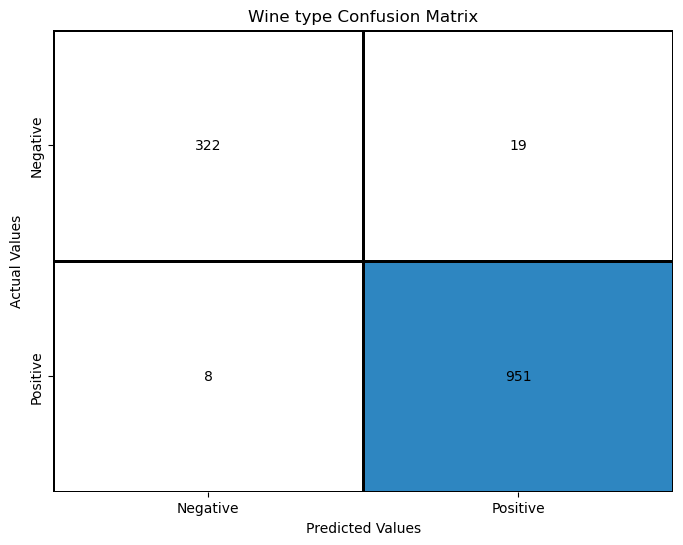

In [80]:
cm = confusion_matrix(y_test, preds)
cm_df = pd.DataFrame(cm,
                     index = ["Negative","Positive"],
                     columns = ["Negative","Positive"])
plt.figure(figsize=(8,6))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF", "#AED6F1", "#2E86C1"])

sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Wine type Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
# Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=101)

In [83]:
# fit model
RF_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=101)

In [84]:
# predictions
preds = RF_clf.predict(X_test)

In [85]:
# accuracy
acc = accuracy_score(y_test, preds)
print(acc)

0.9953846153846154


In [86]:
y_test

3103    1
1419    0
4761    1
4690    1
4032    1
       ..
889     0
2850    1
4917    1
5198    1
5643    1
Name: Wine type, Length: 1300, dtype: int64

In [87]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3103,7.0,0.170,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8
1419,7.7,0.640,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5
4761,6.8,0.390,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7
4690,6.3,0.280,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6
4032,7.4,0.350,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
889,10.7,0.900,0.34,6.6,0.112,23.0,99.0,1.00289,3.22,0.68,9.3,5
2850,5.7,0.245,0.33,1.1,0.049,28.0,150.0,0.99270,3.13,0.42,9.3,5
4917,6.6,0.160,0.35,1.8,0.042,26.0,105.0,0.98962,3.19,0.75,12.4,7
5198,6.6,0.390,0.38,9.7,0.053,49.0,226.0,0.99787,3.30,0.57,9.4,6


In [88]:
#Evaluatio Metrics
from sklearn.metrics import classification_report

In [89]:
print (classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       341
           1       0.99      1.00      1.00       959

    accuracy                           1.00      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



In [90]:
from sklearn.metrics import confusion_matrix

In [91]:
confusion_matrix(y_test, preds)

array([[336,   5],
       [  1, 958]])

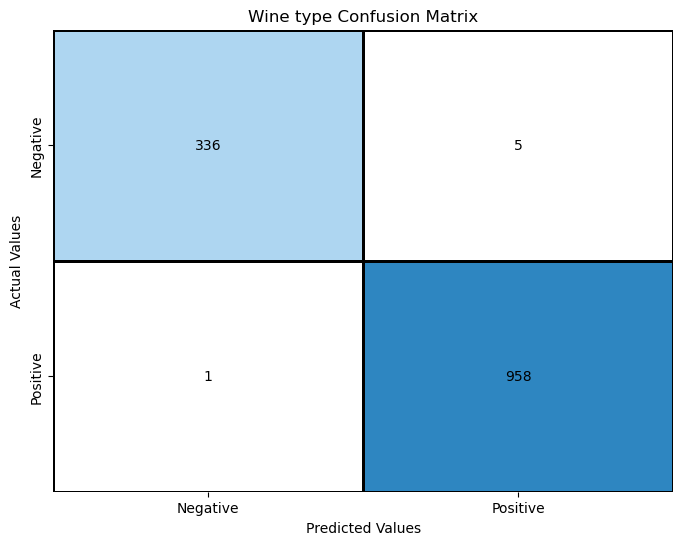

In [92]:
cm = confusion_matrix(y_test, preds)
cm_df = pd.DataFrame(cm,
                     index = ["Negative","Positive"],
                     columns = ["Negative","Positive"])
plt.figure(figsize=(8,6))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF", "#AED6F1", "#2E86C1"])

sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Wine type Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [93]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
Scaler.fit(X_train)
X_train_scaled=Scaler.transform(X_train)
X_test_scaled=Scaler.transform(X_test)

In [94]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1916,6.6,0.240,0.35,7.70,0.031,36.0,135.0,0.99380,3.19,0.37,10.5,5
947,8.3,0.280,0.48,2.10,0.093,6.0,12.0,0.99408,3.26,0.62,12.4,7
877,7.7,0.715,0.01,2.10,0.064,31.0,43.0,0.99371,3.41,0.57,11.8,6
2927,5.2,0.370,0.33,1.20,0.028,13.0,81.0,0.99020,3.37,0.38,11.7,6
6063,6.6,0.260,0.56,15.40,0.053,32.0,141.0,0.99810,3.11,0.49,9.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3772,7.6,0.320,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5
5191,5.6,0.280,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7
5226,6.4,0.370,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5
5390,6.5,0.260,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,5


In [95]:
X_train_scaled

array([[0.23728814, 0.10666667, 0.28455285, ..., 0.08426966, 0.40322581,
        0.33333333],
       [0.38135593, 0.13333333, 0.3902439 , ..., 0.2247191 , 0.70967742,
        0.66666667],
       [0.33050847, 0.42333333, 0.00813008, ..., 0.19662921, 0.61290323,
        0.5       ],
       ...,
       [0.22033898, 0.19333333, 0.16260163, ..., 0.11797753, 0.24193548,
        0.33333333],
       [0.22881356, 0.12      , 0.40650407, ..., 0.14044944, 0.24193548,
        0.33333333],
       [0.28813559, 0.36      , 0.04878049, ..., 0.17977528, 0.24193548,
        0.33333333]])

In [96]:
# LogisticRegression model
LR_model = LogisticRegression(random_state=1000)

# fit model
LR_model.fit(X_train_scaled, y_train)

# predictions
preds = LR_model.predict(X_test_scaled)

#accuracy
acc = accuracy_score(y_test, preds)
print(acc)

0.9830769230769231


In [97]:
# Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=101)

# fit model
RF_clf.fit(X_train, y_train)

# predictions
preds = RF_clf.predict(X_test)

# accuracy
acc = accuracy_score(y_test, preds)
print(acc)

0.9953846153846154


In [98]:
from sklearn.neighbors import KNeighborsClassifier